# `Pandas`

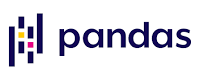


The `pandas` library is practically use for any data manipulation task in python. As a result, learning `pandas` is a great skill to have as data scientists. 

During this class time we will be using the `colleges_dataset_not_cleaned.csv` datset we made last class after web scraping money.com 

Before we do anything lets first explore the datasets first (visually)

Lets first start off by importing the `pandas` and `numpy` libraries

In [3]:
import pandas as pd
pd.options.display.max_columns = 30
import numpy as np

Before we can even do anything to this dataset we need to load it. Load in the dataset using `pandas` below.

In [4]:
college_df = pd.read_csv(r'/content/colleges_dataset_not_cleaned.csv')

## Exploring the Data

Awesome, now lets explore the datset with `pandas`

In [6]:
college_df.head()

,Unnamed: 0,college_names,college_location,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,median_sat_act_score,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree,median_student_debt,percent_earning_more_than_a_high_school_grad
0,0,University of Michigan,"Ann Arbor, MI",89.41,\n 23%\n,"\n $32,400\n","\n $18,800\n",\n 53%\n,\n 92%\n,"\n $75,840\n","$2,670",1440/33,No,"31,050",81%,92%,11%,"$5,670",4.2 years,"$18,526",81%
1,1,University of North Carolina at Chapel Hill,"Chapel Hill, NC",86.22,\n 23%\n,"\n $25,200\n","\n $10,600\n",\n 53%\n,\n 89%\n,"\n $61,920\n","$3,750",1410/31,No,"19,010",90%,100%,5%,"$7,030",4.1 years,"$14,500",78%
2,2,University of Virginia,"Charlottesville, VA",86.11,\n 24%\n,"\n $36,700\n","\n $20,100\n",\n 48%\n,\n 94%\n,"\n $77,050\n","$12,480",1430/32,No,"16,720",91%,100%,4%,"$5,630",4.1 years,"$18,250",84%
3,3,Massachusetts Maritime Academy,"Buzzards Bay, MA",86.07,\n 91%\n,"\n $31,600\n","\n $18,600\n",\n 43%\n,\n 73%\n,"\n $91,670\n","$6,380",1100/22,No,"1,650",56%,71%,11%,"$5,530",4.2 years,"$26,000",91%
4,4,Virginia Military Institute,"Lexington, VA",85.14,\n 60%\n,"\n $33,300\n","\n $20,000\n",\n 85%\n,\n 78%\n,"\n $71,910\n","$10,560",1180/25,No,"1,700",77%,88%,14%,"$13,100",4.1 years,"$21,500",85%


In [7]:
college_df.shape

(623, 21)

In [8]:
college_df.dtypes

Unnamed: 0                                        int64
college_names                                    object
college_location                                 object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
median_sat_act_score                             object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                 

Notice that we can't really do much with this data because it is very messy.

## Cleaning the Data

First lets delete the column `Unnamed: 0`, this is bascially the index, but we don't need this since `pandas` does this for us

In [9]:
college_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Expanding Columns

Now lets expand some of these columns. Create the following columns - 

1) `Town` and `State` that are the town and state of their respectize college

2) `median_sat` and `median_act` that are the sat and act of the respective college

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

In [10]:
college_df[["Town", "State"]] = college_df['college_location'].str.split(',', expand=True)
college_df[["median_sat", "median_act"]] = college_df['median_sat_act_score'].str.split('/', expand=True)
# college_df[["avg_time_to_a_degree", "del_years"]] = college_df['avg_time_to_a_degree'].str.split(' ', expand=True)

In [11]:
# college_df.head()

Notice how the original columns are still there, drop these columns inplace

In [12]:
college_df.drop(["college_location", "median_sat_act_score"], axis=1, inplace=True)

In [13]:
# college_df.head()

Try doing something similar with the `avg_time_to_a_degree` columns. How can we get rid of the string 'years'.

In [14]:
college_df[["avg_time_to_a_degree", "del_years"]] = college_df['avg_time_to_a_degree'].str.split(' ', expand=True)

In [15]:
college_df.drop(['del_years'], axis = 1, inplace=True)

### Dealing With Whitespace

Print out the 3rd element of the first row, what do you notice?

In [16]:
college_df.iloc[0, 3]

'\n                  $32,400\n              '

In [17]:
college_df.head()

,college_names,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,University of Michigan,89.41,\n 23%\n,"\n $32,400\n","\n $18,800\n",\n 53%\n,\n 92%\n,"\n $75,840\n","$2,670",No,"31,050",81%,92%,11%,"$5,670",4.2,"$18,526",81%,Ann Arbor,MI,1440,33
1,University of North Carolina at Chapel Hill,86.22,\n 23%\n,"\n $25,200\n","\n $10,600\n",\n 53%\n,\n 89%\n,"\n $61,920\n","$3,750",No,"19,010",90%,100%,5%,"$7,030",4.1,"$14,500",78%,Chapel Hill,NC,1410,31
2,University of Virginia,86.11,\n 24%\n,"\n $36,700\n","\n $20,100\n",\n 48%\n,\n 94%\n,"\n $77,050\n","$12,480",No,"16,720",91%,100%,4%,"$5,630",4.1,"$18,250",84%,Charlottesville,VA,1430,32
3,Massachusetts Maritime Academy,86.07,\n 91%\n,"\n $31,600\n","\n $18,600\n",\n 43%\n,\n 73%\n,"\n $91,670\n","$6,380",No,"1,650",56%,71%,11%,"$5,530",4.2,"$26,000",91%,Buzzards Bay,MA,1100,22
4,Virginia Military Institute,85.14,\n 60%\n,"\n $33,300\n","\n $20,000\n",\n 85%\n,\n 78%\n,"\n $71,910\n","$10,560",No,"1,700",77%,88%,14%,"$13,100",4.1,"$21,500",85%,Lexington,VA,1180,25


How do we get rid of the problem above? Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

In the cell below replace all the values of columns with whitespace without any whitespace

In [18]:
for i in [2,3,4,5,6,7]:
    college_df.iloc[:,i] = college_df.iloc[:,i].str.strip()

In [19]:
college_df.iloc[0, 3]

'$32,400'

### Exploring Missing Values

Now lets explore some of the missing values.

`pandas` is smart, so it is able to detect the missing values even though we initially read them in as strings, notice how the column types are still also objects. 

In [20]:
college_df.isnull().sum()

college_names                                    0
overall_score                                    0
acceptance_rate                                  0
Est_full_price_22_23                             0
Est_price_with_avg_grant                         0
percent_of_student_who_get_grants                0
graduation_rate                                  0
early_career_earnings                            0
avg_price_for_low_income_students                0
sat_act_required                                 0
undergrad_enrollment                             0
percent_of_students_with_need_who_get_grants    18
percent_of_need_met                             31
percent_of_students_who_get_merit_grants        39
avg_merit_grant                                 38
avg_time_to_a_degree                             0
median_student_debt                              0
percent_earning_more_than_a_high_school_grad     1
Town                                             0
State                          

If we look at the data we can see where some of these `NaN` values are coming from (California State University, Channel Islands)

So pandas can detect the `NaN` values but how about this: https://money.com/best-colleges/profile/ringling-college-of-art-and-design/

In [21]:
np.sum(college_df['median_sat'] == 'NA') + np.sum(college_df['median_act'] == 'NA')

205

In [22]:
np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)

college_names                                     0
overall_score                                     0
acceptance_rate                                   1
Est_full_price_22_23                              0
Est_price_with_avg_grant                          0
percent_of_student_who_get_grants                 0
graduation_rate                                   0
early_career_earnings                             1
avg_price_for_low_income_students                 0
sat_act_required                                  0
undergrad_enrollment                              0
percent_of_students_with_need_who_get_grants      0
percent_of_need_met                               0
percent_of_students_who_get_merit_grants          0
avg_merit_grant                                   0
avg_time_to_a_degree                              0
median_student_debt                               0
percent_earning_more_than_a_high_school_grad      0
Town                                              0
State       

In [23]:
n_cols = np.array(np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)  > 0)
n_cols

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [24]:
college_df.iloc[:, n_cols] = college_df.iloc[:, n_cols].replace(["NA", "N/A"], np.nan)

In [25]:
college_df.isna().sum()

college_names                                     0
overall_score                                     0
acceptance_rate                                   1
Est_full_price_22_23                              0
Est_price_with_avg_grant                          0
percent_of_student_who_get_grants                 0
graduation_rate                                   0
early_career_earnings                             1
avg_price_for_low_income_students                 0
sat_act_required                                  0
undergrad_enrollment                              0
percent_of_students_with_need_who_get_grants     18
percent_of_need_met                              31
percent_of_students_who_get_merit_grants         39
avg_merit_grant                                  38
avg_time_to_a_degree                              0
median_student_debt                               0
percent_earning_more_than_a_high_school_grad      1
Town                                              0
State       

Let will talk about how to deal with this a bit later :)

## Changing Series types

In [26]:
college_df.dtypes

college_names                                    object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

In [27]:
print(college_df["overall_score"][0])
type(college_df["overall_score"][0])

89.41


numpy.float64

In [28]:
college_df["median_sat"] = college_df["median_sat"].astype('float64')
college_df["median_act"] = college_df["median_act"].astype('float64')

In [29]:
college_df.dtypes

college_names                                    object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

## Reformatting Values

Reformat strings

In [30]:
def reformat(string):
    try:
        remove_characters = "%$,"
        for character in remove_characters:
            string = string.replace(character, "")
        return string
    except:
        return string

reformat("$32,201"), reformat("13%")

('32201', '13')

In [31]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].apply(reformat)

In [32]:
college_df.head()

,college_names,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,University of Michigan,89.41,23,32400,18800,53,92,75840,2670,No,31050,81,92,11,5670,4.2,18526,81,Ann Arbor,MI,1440.0,33.0
1,University of North Carolina at Chapel Hill,86.22,23,25200,10600,53,89,61920,3750,No,19010,90,100,5,7030,4.1,14500,78,Chapel Hill,NC,1410.0,31.0
2,University of Virginia,86.11,24,36700,20100,48,94,77050,12480,No,16720,91,100,4,5630,4.1,18250,84,Charlottesville,VA,1430.0,32.0
3,Massachusetts Maritime Academy,86.07,91,31600,18600,43,73,91670,6380,No,1650,56,71,11,5530,4.2,26000,91,Buzzards Bay,MA,1100.0,22.0
4,Virginia Military Institute,85.14,60,33300,20000,85,78,71910,10560,No,1700,77,88,14,13100,4.1,21500,85,Lexington,VA,1180.0,25.0


Finish changing dtypes

In [33]:
college_df["sat_act_required"] = college_df["sat_act_required"].astype('string')
college_df["college_names"] = college_df["college_names"].astype('string')
college_df["Town"] = college_df["Town"].astype('string')
college_df["State"] = college_df["State"].astype('string')

In [34]:
college_df.dtypes

college_names                                    string
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 string
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

In [35]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    print(col)
    college_df[col] = college_df[col].astype('float64')

Est_full_price_22_23
Est_price_with_avg_grant
acceptance_rate
avg_merit_grant
avg_price_for_low_income_students
early_career_earnings
graduation_rate
median_student_debt
percent_earning_more_than_a_high_school_grad
percent_of_need_met
percent_of_student_who_get_grants
percent_of_students_who_get_merit_grants
percent_of_students_with_need_who_get_grants
undergrad_enrollment


In [36]:
college_df.dtypes

college_names                                    string
overall_score                                   float64
acceptance_rate                                 float64
Est_full_price_22_23                            float64
Est_price_with_avg_grant                        float64
percent_of_student_who_get_grants               float64
graduation_rate                                 float64
early_career_earnings                           float64
avg_price_for_low_income_students               float64
sat_act_required                                 string
undergrad_enrollment                            float64
percent_of_students_with_need_who_get_grants    float64
percent_of_need_met                             float64
percent_of_students_who_get_merit_grants        float64
avg_merit_grant                                 float64
avg_time_to_a_degree                             object
median_student_debt                             float64
percent_earning_more_than_a_high_school_grad    

### Imputing Missing Values

In [37]:
college_df.isnull().sum()

college_names                                     0
overall_score                                     0
acceptance_rate                                   1
Est_full_price_22_23                              0
Est_price_with_avg_grant                          0
percent_of_student_who_get_grants                 0
graduation_rate                                   0
early_career_earnings                             1
avg_price_for_low_income_students                 0
sat_act_required                                  0
undergrad_enrollment                              0
percent_of_students_with_need_who_get_grants     18
percent_of_need_met                              31
percent_of_students_who_get_merit_grants         39
avg_merit_grant                                  38
avg_time_to_a_degree                              0
median_student_debt                               0
percent_earning_more_than_a_high_school_grad      1
Town                                              0
State       

In [38]:
college_df.median()

<ipython-input-38-446a3a04296e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  college_df.median()


overall_score                                      63.93
acceptance_rate                                    71.00
Est_full_price_22_23                            47500.00
Est_price_with_avg_grant                        23000.00
percent_of_student_who_get_grants                  82.00
graduation_rate                                    68.00
early_career_earnings                           54305.00
avg_price_for_low_income_students               15360.00
undergrad_enrollment                             3590.00
percent_of_students_with_need_who_get_grants       94.00
percent_of_need_met                                73.50
percent_of_students_who_get_merit_grants           17.00
avg_merit_grant                                 11700.00
avg_time_to_a_degree                                4.20
median_student_debt                             23300.00
percent_earning_more_than_a_high_school_grad       73.00
median_sat                                       1170.00
median_act                     

In [39]:
college_df = college_df.fillna(college_df.median()) 

<ipython-input-39-a4f2e61c7feb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  college_df = college_df.fillna(college_df.median())


In [40]:
college_df.isna().sum()

college_names                                   0
overall_score                                   0
acceptance_rate                                 0
Est_full_price_22_23                            0
Est_price_with_avg_grant                        0
percent_of_student_who_get_grants               0
graduation_rate                                 0
early_career_earnings                           0
avg_price_for_low_income_students               0
sat_act_required                                0
undergrad_enrollment                            0
percent_of_students_with_need_who_get_grants    0
percent_of_need_met                             0
percent_of_students_who_get_merit_grants        0
avg_merit_grant                                 0
avg_time_to_a_degree                            0
median_student_debt                             0
percent_earning_more_than_a_high_school_grad    0
Town                                            0
State                                           0


### Renaming Columns

In [41]:
college_df.rename(columns = {'avg_time_to_a_degree':'avg_time_to_a_degree_years'}, inplace = True)

### Saving a file

In [42]:
college_df.to_csv("colleges_dataset_cleaned.csv")